# Clase 14 - Ecuaciones diferenciales ordinarias

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
plt.style.use('seaborn-poster')

## Método de Euler

In [3]:
def Euler(f,x0,xf,y0,n):
    y = np.zeros(n)
    h = (xf - x0)/n
    x = np.linspace(x0,xf,n)
    y[0] = y0
    for i in range(1,n):
        y[i] = y[i-1] + h*f(x[i-1],y[i-1])
        
    return (x,y)

Apliquemos el método de Euler a la ecuación diferencial

$$
y' = \alpha[y - \sin(x)] + \cos(x)
$$

con condición inicial $y(\pi/4)=1/\sqrt{2}$.

In [4]:
def funcion(x,y):
    alpha = -0.2  # Intente con alpha = -10
    f = alpha*(y - np.sin(x)) + np.cos(x)
    return (f)

In [5]:
x0 = np.pi/4
xf = np.pi
h = np.pi/10
n = int((xf - x0)/h)
y0 = 1/pow(2,0.5)
xs, ys = Euler(funcion,x0,xf,y0,n)

In [6]:
h = np.pi/20
n = int((xf - x0)/h)
xs1, ys1 = Euler(funcion,x0,xf,y0,n)

In [7]:
h = np.pi/100
n = int((xf - x0)/h)
xs2, ys2 = Euler(funcion,x0,xf,y0,n)

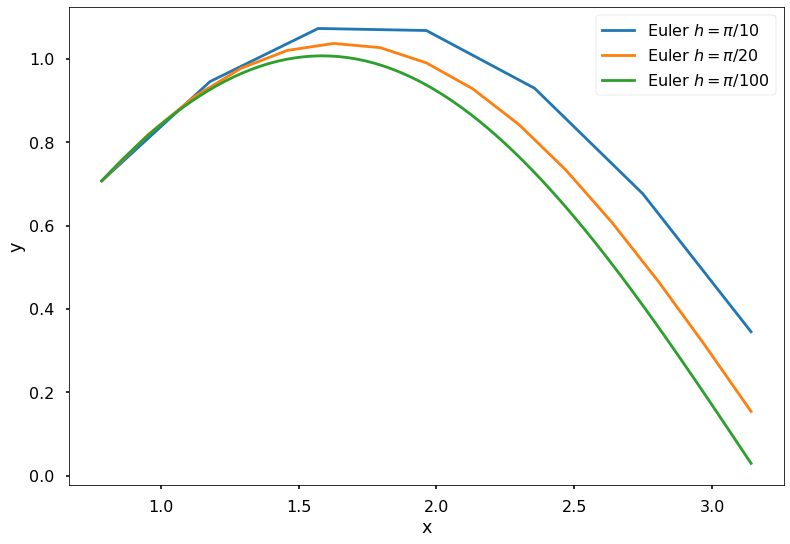

In [8]:
plt.plot(xs,ys,label=r'Euler $h=\pi/10$')
plt.plot(xs1,ys1,label=r'Euler $h=\pi/20$')
plt.plot(xs2,ys2,label=r'Euler $h=\pi/100$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

## Método de Runge-Kutta con paso variable

Utilicemos el integrador de Runge-Kutta de 4-5 orden y paso variable implementado en ${\it scipy}$. Este es uno de los varios integradores de esta rutina https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp 

In [9]:
from scipy.integrate import solve_ivp

In [10]:
x0 = np.pi/4
xf = np.pi
h = np.pi/100
n = int((xf - x0)/h)
y0 = 1/pow(2,0.5)
sol = solve_ivp(funcion,[x0,xf],[y0],dense_output=True)

In [11]:
print (sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 20
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f8b01df7290>
   status: 0
  success: True
        t: array([0.78539816, 0.88530709, 1.8843964 , 3.14159265])
 t_events: None
        y: array([[7.07106781e-01, 7.74109430e-01, 9.51228929e-01, 4.73626593e-06]])
 y_events: None


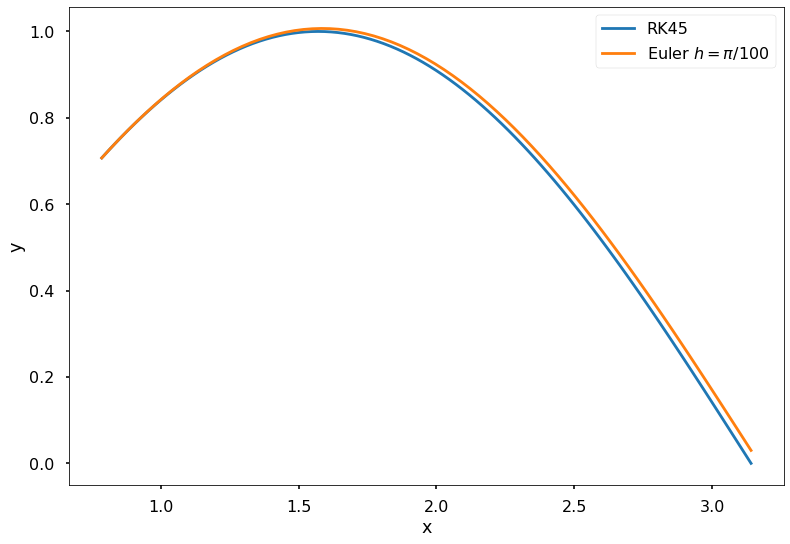

In [12]:
t = np.linspace(x0,xf,100)
z = sol.sol(t)
plt.plot(t,z.T,label='RK45')
plt.plot(xs2,ys2,label=r'Euler $h=\pi/100$')
plt.xlabel('x')
plt.legend()
plt.ylabel('y');

## Método de Verlet

El integrador de Verlet es un integrador de segundo orden pensado para ecuaciones diferenciales ordinaria de segundo orden del tipo

$$
\frac{d^2\vec{x}}{dt^2} = \vec{f}(\vec{x})
$$

donde $\vec{f}$ es la fuerza por unidad de masa (aceleración).

El integrador de Verlet para esta ecuación está dado por

\begin{eqnarray*}
\vec{x}_1 & = & \vec{x}_0 + \vec{v}_0\Delta t + \frac{1}{2}\vec{a}(\vec{x}_0)\Delta t^2 \\
\vec{v}_1 & = & \vec{v}_0 + \frac{1}{2}[\vec{a}(\vec{x}_0) + \vec{a}(\vec{x}_1)]\Delta t
\end{eqnarray*}

## Órbita en torno al Sol

Consideremos una partícula orbitando en torno al Sol. La fuerza por unidad de masa en coordenadas cartesianas está dada por

$$ f_x = -\frac{x}{(x^2+y^2)^{3/2}}$$

$$ f_y = -\frac{y}{(x^2+y^2)^{3/2}} $$

donde hemos usado un sistema de unidades con $G=1$ y $M_\odot=1$ (puede serle interesante investigar como transformar estas unidades computacionales a unidades físicas).

In [13]:
def force(x):
    aux = pow(x[0]**2 + x[1]**2,-3.0/2.0)
    return (-x[0]*aux,-x[1]*aux)

La función verlet() tiene como input la posición y velocidad en $t=0$, el tiempo final $t_{\textrm{stop}}$ y el número de iteraciones $n_{\textrm{iter}}$. La salida son arreglos que contienen el tiempo y las coordenadas cartesianas de la posición y la velocidad.

In [14]:
def verlet(vec0,fuerza,tstop,niter):
    h = tstop/niter
    x = np.zeros(niter+1)
    y = np.zeros(niter+1)
    vx = np.zeros(niter+1)
    vy = np.zeros(niter+1)
    t = np.linspace(0,tstop,niter)
    
    x[0] = vec0[0]
    y[0] = vec0[1]
    vx[0] = vec0[2]
    vy[0] = vec0[3]
    
    a0 = fuerza([x[0],y[0]])
    
    for i in range(1,niter+1):
        x[i] = x[i-1] + h*(vx[i-1] + 0.5*h*a0[0])
        y[i] = y[i-1] + h*(vy[i-1] + 0.5*h*a0[1])
        a1 = fuerza([x[i],y[i]])
        vx[i] = vx[i-1] + 0.5*h*(a0[0] + a1[0])
        vy[i] = vy[i-1] + 0.5*h*(a0[1] + a1[1])
        a0 = a1
        
    return (t,x,y,vx,vy)

# Órbita circular con radio $R = 1$ 

In [15]:
tstop = 2*np.pi
niter = 200
Y0 = np.array([1.0,0.0,0.0,1.0])
time,x,y,vx,vy = verlet(Y0,force,tstop,niter)

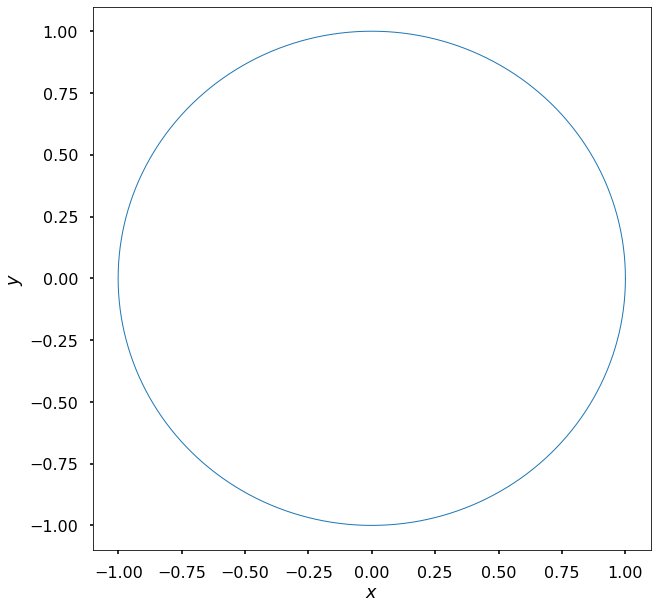

In [16]:
plt.figure(figsize=(10,10))
plt.plot(x,y,lw=1)
plt.xlabel('$x$')
plt.ylabel('$y$');

# Animación de la órbita

In [17]:
%%capture
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

dt = tstop/niter

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-1.2, 1.2), ylim=(-1.2, 1.2))
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

line, = ax.plot([], [], lw=2)
time_template = 'time = %.1f s'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i):
    line.set_data(x[:i], y[:i])
    time_text.set_text(time_template%(i*dt))
    return line, time_text

anim = animation.FuncAnimation(fig, animate, interval=25,  frames=niter, 
                               init_func=init, blit=True)

In [18]:
HTML(anim.to_jshtml())